# Real Fake Jobs

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
df = pd.read_csv('./database/fake_job_postings.csv')

In [37]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [38]:

df.describe().T

,count,mean,std,min,25%,50%,75%,max
job_id,17880.0,8940.500000,5161.655742,1.0,4470.75,8940.5,13410.25,17880.0
telecommuting,17880.0,0.042897,0.202631,0.0,0.00,0.0,0.00,1.0
has_company_logo,17880.0,0.795302,0.403492,0.0,1.00,1.0,1.00,1.0
has_questions,17880.0,0.491723,0.499945,0.0,0.00,0.0,1.00,1.0
fraudulent,17880.0,0.048434,0.214688,0.0,0.00,0.0,0.00,1.0


In [39]:
df.shape

(17880, 18)

In [40]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2696
benefits                7212
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [41]:
df.notnull().sum()


job_id                 17880
title                  17880
location               17534
department              6333
salary_range            2868
company_profile        14572
description            17879
requirements           15184
benefits               10668
telecommuting          17880
has_company_logo       17880
has_questions          17880
employment_type        14409
required_experience    10830
required_education      9775
industry               12977
function               11425
fraudulent             17880
dtype: int64

In [42]:
missing_values = pd.DataFrame(
        {
            'missing_values_percentage': df.isnull().sum() * 100/ df.shape[0] ,
            'total_values': df.isnull().sum()
        }
    )
    
missing_values.sort_values(by='missing_values_percentage', ascending=False)

,missing_values_percentage,total_values
salary_range,83.959732,15012
department,64.580537,11547
required_education,45.329978,8105
benefits,40.335570,7212
required_experience,39.429530,7050
function,36.101790,6455
industry,27.421700,4903
employment_type,19.412752,3471
company_profile,18.501119,3308
requirements,15.078300,2696


In [45]:
cols_to_drop = ['job_id', 'title', 'company_profile', 'description', 'requirements', 'benefits']

In [46]:
df.drop(columns=cols_to_drop, inplace=True)

In [47]:
for column in df.columns:
    if df[column].isna().sum() > 0 :
        print(f'Column con nulls ratio: {column}')
        print(f'Nulls ratio: {df[column].isna().sum() / df.shape[0] * 100}%')
        print(df.groupby(
            df[column].isna())['fraudulent'].value_counts())
        print('-'*100)

Column con nulls ratio: location
Nulls ratio: 1.9351230425055927%
location  fraudulent
False     0             16687
          1               847
True      0               327
          1                19
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column con nulls ratio: department
Nulls ratio: 64.58053691275167%
department  fraudulent
False       0              5998
            1               335
True        0             11016
            1               531
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------
Column con nulls ratio: salary_range
Nulls ratio: 83.95973154362416%
salary_range  fraudulent
False         0              2645
              1               223
True          0             14369
              1               643
Name: count, dtype: int64
-----------------------------------------------------------------

<Axes: >

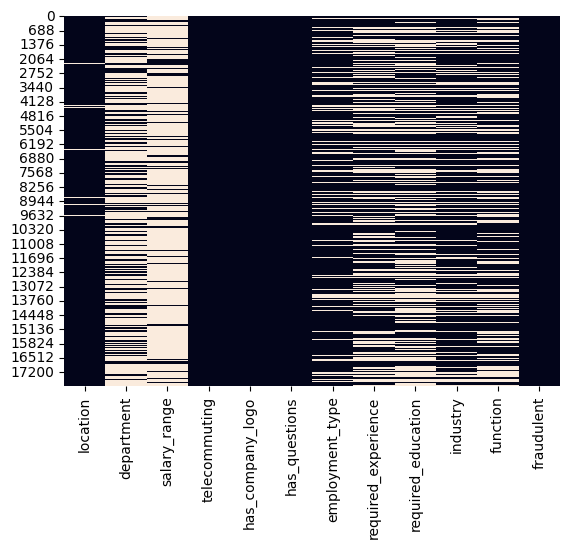

In [48]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.head()

,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,"US, NY, New York",Marketing,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,"NZ, , Auckland",Success,NaN,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,"US, IA, Wever",NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,"US, DC, Washington",Sales,NaN,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,"US, FL, Fort Worth",NaN,NaN,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [ ]:
ordinals = ['required_experience', 'required_education']
binary = ['fraudulent', 'telecommuting', 'has_company_logo', 'has_questions']
categorical = ['salary_range', 'location', 'department', 'employment_type', 'industry', 'function']

# df[ordinals] = df[ordinals].astype('category')
# df[binary] = df[binary].astype('category')
# df[categorical] = df[categorical].astype('category')


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   location             17534 non-null  category
 1   department           6333 non-null   category
 2   salary_range         2868 non-null   category
 3   telecommuting        17880 non-null  category
 4   has_company_logo     17880 non-null  category
 5   has_questions        17880 non-null  category
 6   employment_type      14409 non-null  category
 7   required_experience  10830 non-null  category
 8   required_education   9775 non-null   category
 9   industry             12977 non-null  category
 10  function             11425 non-null  category
 11  fraudulent           17880 non-null  category
dtypes: category(12)
memory usage: 458.3 KB


In [72]:
from sklearn.preprocessing import  LabelEncoder

le = LabelEncoder()

for col in ordinals:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
        df[col] = le.fit_transform(df[col])


TypeError: Cannot setitem on a Categorical with a new category (Unknown), set the categories first

In [ ]:

for col in categorical:
    if col in df.columns:
        df[col] = df[col].fillna('Unknown')
        df[col] = le.fit_transform(df[col])


df_nominal = pd.get_dummies(df, columns=categorical,drop_first=True)

df_numerics = df[ordinals + binary]

In [53]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

df_imputed.head()

ValueError: could not convert string to float: 'US, NY, New York'